In [1]:
import numpy as np
from higher_order import Bispectrum,apply_window
import matplotlib.cbook as cbook
from matplotlib import mlab


def test_squared_bicoherence():
    '''Corresponds to Fig. 4 of Kim & Powers, IEEE Trans. Plasma Sci, 1979,
    but use more realizations to reduce random error and the likelihood
    of a false testing fail.
    '''
    # Timebase & frequencies:
    # -----------------------
    # Timebase parameters
    Fs = 2.       # => Nyquist frequency is unity
    Nreal = 64  # if realizations overlap, we'll end up w/ more than `Nreal`
    Npts_per_real = 128
    t = np.arange(Nreal * Npts_per_real) / Fs

    # Specify wave frequencies
    fb = 0.220  # [fb] = Nyquist frequency
    fc = 0.375  # [fc] = Nyquist frequency
    fd = fb + fc

    # Specify phases of waves b & c
    # -----------------------------
    # Phase of waves b & c, each randomly selected to be within [-pi, pi]
    theta_b = 2 * np.pi * (np.random.rand(1) - 0.5)[0]
    theta_c = 2 * np.pi * (np.random.rand(1) - 0.5)[0]

    # Determine phase for wave d:
    # ---------------------------
    # If wave d is nonlinearly generated via interaction of waves b & c,
    # then wave d will be coherent with waves b & c, i.e.
    #
    #       theta_d = theta_b + theta_c.
    #
    # If wave d is *not* nonlinearly generated via interaction of
    # waves b & c, then wave d will have a random phase relative
    # to waves b & c in *EACH* realization.
    theta_d = np.zeros(len(t))
    for r in np.arange(Nreal):
        i1 = r * Npts_per_real
        i2 = ((r + 1) * Npts_per_real) - 1
        theta_d[i1:i2] = 2 * np.pi * (np.random.rand(1) - 0.5)[0]

    # Construct total signal:
    # -----------------------
    x = np.cos((2 * np.pi * fb * t) + theta_b)
    x += np.cos((2 * np.pi * fc * t) + theta_c)
    x += (0.5 * np.cos((2 * np.pi * fd * t) + theta_d))
    x += (np.cos((2 * np.pi * fb * t) + theta_b)
          * np.cos((2 * np.pi * fc * t) + theta_c))

    # Add noise to signal (interestingly, artifacts *decrease* w/ noise):
    # -------------------------------------------------------------------
    noise_dBc = -20
    Ax_eff = np.std(x)  # Power in signal x is `Ax_eff ^ 2`
    Anoise = np.sqrt(10 ** (noise_dBc / 10.)) * Ax_eff
    x += (Anoise * np.random.randn(len(t)))
    print('xshape',x.shape)
    print('tshape',t.shape)

    # Bispectral calculations:
    # ------------------------
    B = Bispectrum(
        x, x, Fs=Fs, t0=t[0],
        tlim=None, Npts_per_real=Npts_per_real,window=mlab.window_hanning)

    # Check bispectrum against expected values:
    # -----------------------------------------
    # Nonlinear sum interaction is only responsible
    # for approximately half of the power at (fb + fc).
    # Test that the computed value sits within a reasonable
    # neighborhood of 0.5...
    dfr = np.abs(B.frow - fb)
    dfc = np.abs(B.fcol - fc)
    rind = np.where(dfr == np.min(dfr))[0][0]
    cind = np.where(dfc == np.min(dfc))[0][0]
    print('test1',B.b2xy[rind, cind])
    

    # Nonlinear difference interaction is responsible
    # for approximately all of the power at (fc - fb)
    dfr = np.abs(B.frow + fb)
    rind = np.where(dfr == np.min(dfr))[0][0]
    print('test2:',B.b2xy[rind, cind])
   
    return B

In [2]:
B = test_squared_bicoherence()


xshape (8192,)
tshape (8192,)

dt: 64
df: 0.015625
Npts_per_real: 128
overlap: 0.00
detrend: None

Bxy percent complete: 0.0 
Bxy percent complete: 0.0 
Bxy percent complete: 0.1 
Bxy percent complete: 0.1 
Bxy percent complete: 0.1 
Bxy percent complete: 0.2 
Bxy percent complete: 0.2 
Bxy percent complete: 0.2 
Bxy percent complete: 0.3 
Bxy percent complete: 0.3 
Bxy percent complete: 0.3 
Bxy percent complete: 0.3 
Bxy percent complete: 0.4 
Bxy percent complete: 0.4 
Bxy percent complete: 0.4 
Bxy percent complete: 0.5 
Bxy percent complete: 0.5 
Bxy percent complete: 0.5 
Bxy percent complete: 0.6 
Bxy percent complete: 0.6 
Bxy percent complete: 0.6 
Bxy percent complete: 0.7 
Bxy percent complete: 0.7 
Bxy percent complete: 0.7 
Bxy percent complete: 0.8 
Bxy percent complete: 0.8 
Bxy percent complete: 0.8 
Bxy percent complete: 0.9 
Bxy percent complete: 0.9 
Bxy percent complete: 0.9 
Bxy percent complete: 1.0 
Bxy percent complete: 1.0 
Bxy percent complete: 1.0 
Bxy percen

Bxy percent complete: 94.1 
Bxy percent complete: 94.2 
Bxy percent complete: 94.2 
Bxy percent complete: 94.2 
Bxy percent complete: 94.3 
Bxy percent complete: 94.3 
Bxy percent complete: 94.3 
Bxy percent complete: 94.4 
Bxy percent complete: 94.4 
Bxy percent complete: 94.4 
Bxy percent complete: 94.4 
Bxy percent complete: 94.5 
Bxy percent complete: 94.5 
Bxy percent complete: 94.5 
Bxy percent complete: 94.6 
Bxy percent complete: 94.6 
Bxy percent complete: 94.6 
Bxy percent complete: 94.7 
Bxy percent complete: 94.7 
Bxy percent complete: 94.7 
Bxy percent complete: 94.8 
Bxy percent complete: 94.8 
Bxy percent complete: 94.8 
Bxy percent complete: 94.9 
Bxy percent complete: 94.9 
Bxy percent complete: 94.9 
Bxy percent complete: 95.0 
Bxy percent complete: 95.0 
Bxy percent complete: 95.0 
Bxy percent complete: 95.1 
Bxy percent complete: 95.1 
Bxy percent complete: 95.1 
Bxy percent complete: 95.1 
Bxy percent complete: 95.2 
Bxy percent complete: 95.2 
Bxy percent complete

b2xy percent complete: 73.4 
b2xy percent complete: 73.4 
b2xy percent complete: 73.4 
b2xy percent complete: 73.4 
b2xy percent complete: 73.5 
b2xy percent complete: 73.5 
b2xy percent complete: 73.5 
b2xy percent complete: 73.6 
b2xy percent complete: 73.6 
b2xy percent complete: 73.6 
b2xy percent complete: 73.7 
b2xy percent complete: 73.7 
b2xy percent complete: 73.7 
b2xy percent complete: 73.8 
b2xy percent complete: 73.8 
b2xy percent complete: 73.8 
b2xy percent complete: 73.9 
b2xy percent complete: 73.9 
b2xy percent complete: 73.9 
b2xy percent complete: 74.0 
b2xy percent complete: 74.0 
b2xy percent complete: 74.0 
b2xy percent complete: 74.0 
b2xy percent complete: 74.1 
b2xy percent complete: 74.1 
b2xy percent complete: 74.1 
b2xy percent complete: 74.2 
b2xy percent complete: 74.2 
b2xy percent complete: 74.2 
b2xy percent complete: 74.3 
b2xy percent complete: 74.3 
b2xy percent complete: 74.3 
b2xy percent complete: 74.4 
b2xy percent complete: 74.4 
b2xy percent c

In [3]:
print(B.b2xy.shape)

(97, 65)


<AxesSubplot:xlabel='$\\mathregular{f_1}$', ylabel='$\\mathregular{f_2}$'>

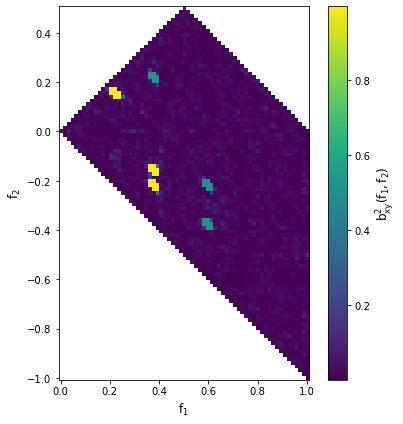

In [4]:
import matplotlib.pyplot as plt
B.plotSquaredBicoherence()

TypeError: Image data of dtype complex128 cannot be converted to float

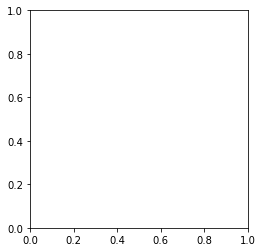